In [1]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [42]:
# horse-or-human 데이터셋 다운로드
_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
_TRAIN2_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
urllib.request.urlretrieve(_TEST_URL, 'validation-horse-or-human.zip')
urllib.request.urlretrieve(_TRAIN2_URL, 'cats_and_dogs_filtered.zip')

('cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x145b777e080>)

In [52]:
# 압축해제
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/horse-or-human/')
zip_ref.close()

local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/validation-horse-or-human/')
zip_ref.close()

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/cats_and_dogs_filtered.zip/')
zip_ref.close()

train_dir = 'tmp/horse-or-human'
validation_dir = 'tmp/validation-horse-or-human'
train2_dir = 'tmp/cats_and_dogs_filtered/train'
valid2_dir = 'tmp/cats_and_dogs_filtered/validation'

In [50]:
# 이미지 데이터 경로 설정
import os
# Directory with our training horse pictures
train_horse_dir = os.path.join('tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
# print(train_human_names[:10])
train_human_names = os.listdir(train_human_dir)

validation_horse_names = os.listdir(validation_horse_dir)
# print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)

train_cat_dir = os.path.join('tmp/cats_and_dogs_filtered/train/cats')
train_dog_dir = os.path.join('tmp/cats_and_dogs_filtered/train/dogs')
valid_cat_dir = os.path.join('tmp/cats_and_dogs_filtered/validation/cats')
valid_dog_dir = os.path.join('tmp/cats_and_dogs_filtered/validation/dogs')
train_cat_names = os.listdir(train_cat_dir)
train_dog_names = os.listdir(train_dog_dir)
valid_cat_names = os.listdir(valid_cat_dir)
valid_dog_names = os.listdir(valid_dog_dir)

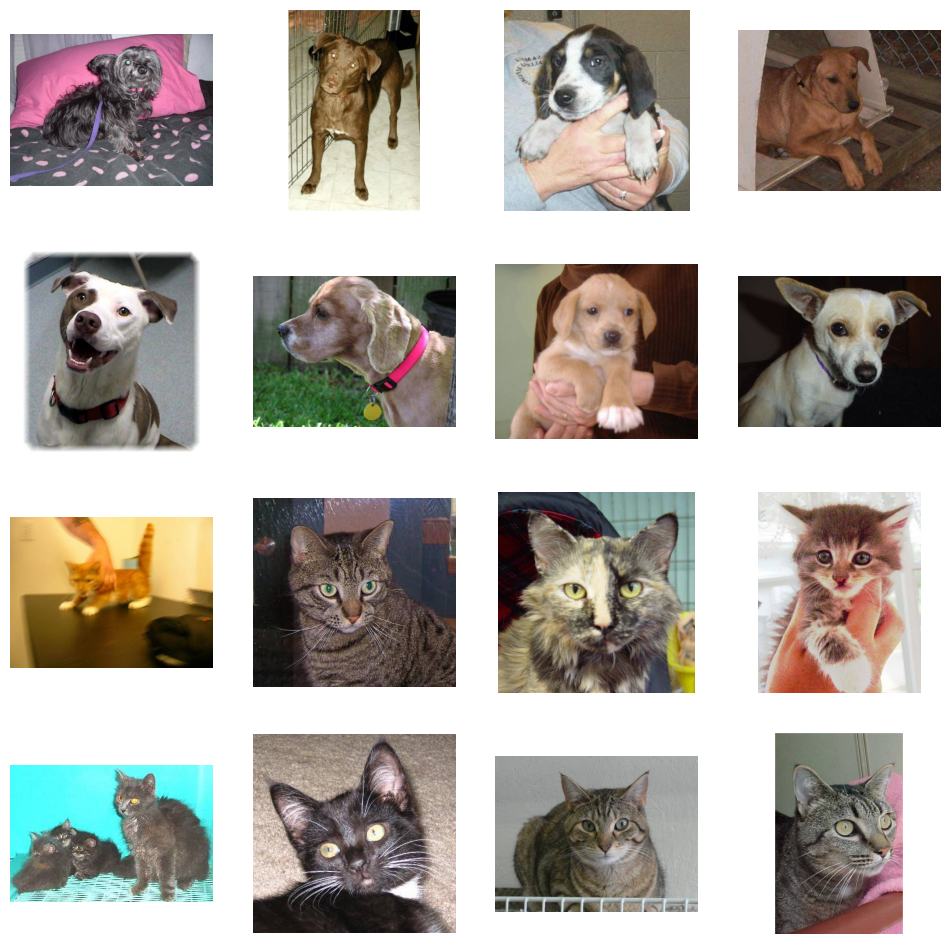

In [57]:
# 데이터 시각화 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0  # 시작 인덱스

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)
pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

# print(next_horse_pix)
# print(next_human_pix)

for i, img_path in enumerate(next_dog_pix+next_cat_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't sh
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

#    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#    tf.keras.layers.MaxPool2D(2,2),

#    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 17, 17, 64)      

### 데이터 전처리 : 이미지 증강(Image Augmentation)

In [60]:
#!pip install Augmentor
import Augmentor

img = Augmentor.Pipeline("augmentation_test/")

##좌우반전
img.flip_left_right(probability=1.0)

##상하반전
img.flip_top_bottom(probability=1.0)

##왜곡
img.random_distortion(probability=1.0,grid_width=10,grid_height=10,magnitude=8)

##증강 이미지수
img.sample(10)

Initialised with 2 image(s) found.
Output directory set to augmentation_test/output.

Processing <PIL.Image.Image image mode=RGB size=557x396 at 0x145B9767010>: 100%|█| 10/10 [00:00<00:00, 172.41 Samples/s


In [67]:
train_datagen = ImageDataGenerator(rescale=1./255.) #정규화(rescale)
#                                  ,rotation_range=40,
#                                  width_shift_range=0.2,
#                                  height_shift_range=0.2,
#                                  shear_range=0.2,
#                                  zoom_range=0.2,
#                                  horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255.)

train_gen = train_datagen.flow_from_directory(train2_dir,
                                             batch_size = 20,
                                             class_mode = 'binary',
                                             target_size = (150,150))

valid_gen = validation_datagen.flow_from_directory(valid2_dir,
                                             batch_size = 20,
                                             class_mode = 'binary',
                                             target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [68]:
history = model.fit(train_gen,
                    validation_data=valid_gen,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2)

Epoch 1/15
100/100 - 6s - loss: 0.7173 - accuracy: 0.5870 - val_loss: 0.6186 - val_accuracy: 0.6770 - 6s/epoch - 64ms/step
Epoch 2/15
100/100 - 4s - loss: 0.6111 - accuracy: 0.6905 - val_loss: 0.5886 - val_accuracy: 0.7000 - 4s/epoch - 36ms/step
Epoch 3/15
100/100 - 4s - loss: 0.5244 - accuracy: 0.7480 - val_loss: 0.5767 - val_accuracy: 0.6920 - 4s/epoch - 35ms/step
Epoch 4/15
100/100 - 3s - loss: 0.4364 - accuracy: 0.8030 - val_loss: 0.6553 - val_accuracy: 0.7090 - 3s/epoch - 35ms/step
Epoch 5/15
100/100 - 4s - loss: 0.3509 - accuracy: 0.8400 - val_loss: 0.6938 - val_accuracy: 0.6780 - 4s/epoch - 36ms/step
Epoch 6/15
100/100 - 4s - loss: 0.2763 - accuracy: 0.8935 - val_loss: 0.6719 - val_accuracy: 0.7280 - 4s/epoch - 35ms/step
Epoch 7/15
100/100 - 4s - loss: 0.1993 - accuracy: 0.9180 - val_loss: 0.7633 - val_accuracy: 0.6970 - 4s/epoch - 35ms/step
Epoch 8/15
100/100 - 3s - loss: 0.1291 - accuracy: 0.9520 - val_loss: 0.9799 - val_accuracy: 0.6970 - 3s/epoch - 35ms/step
Epoch 9/15
100/1

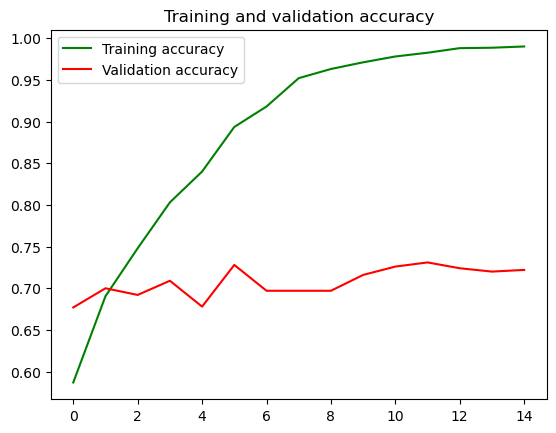

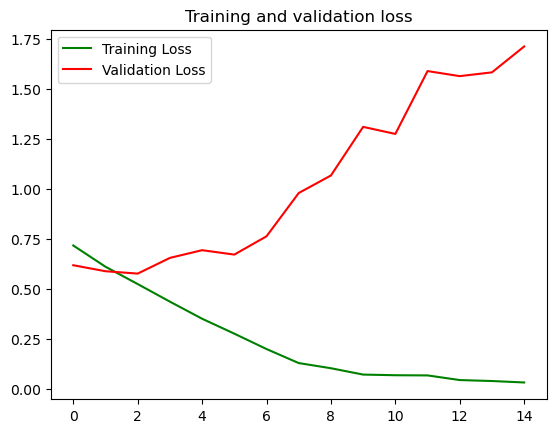

In [69]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [70]:
import numpy as np
from tensorflow.keras.preprocessing import image
def image_predict(file_name):
    path = 'cats_and_dogs예측용이미지/' + file_name
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)   # 2차원 ndarray로 변환
    x = np.expand_dims(x, axis=0) # 3차원으로 변환
    images = np.vstack([x])       # 4차원으로 변환
    classes = model.predict(images, batch_size=10)
    # print(classes[0],end=' ')
    if classes[0] == 1.0:
        print(file_name ,': dog')
    else:
        print(file_name ,': cat')

image_predict('cat_01.jpg')        
image_predict('cat_02.jpg')        
image_predict('cat_03.jpg')        
image_predict('cat_04.jpg')        
image_predict('cat_05.jpg') 

image_predict('dog_01.jpg')        
image_predict('dog_02.jpg')        
image_predict('dog_03.jpg')        
image_predict('dog_04.jpg')        
image_predict('dog_05.jpg')        

image_predict('cat_dog_01.jpg')   
image_predict('cat_dog_02.jpg')   
image_predict('cat_dog_03.jpg')   
image_predict('cat_dog_04.jpg')   
image_predict('cat_dog_05.jpg')   

FileNotFoundError: [Errno 2] No such file or directory: 'cats_and_dogs예측용이미지/cat_01.jpg'

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# RTX3060 GPU : 약 25분 소요
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)